In [2]:
"""
Set up
"""
import os
import pandas as pd
import pprint
import numpy as np


from bids import BIDSLayout


ds_path = os.path.join("data", "ds000157")
print("Using dataset path: \"{}\"".format(ds_path))

layout = BIDSLayout(ds_path)
print(layout)

Using dataset path: "data/ds000157"
BIDS Layout: ...ch/cs682/project/data/ds000157 | Subjects: 30 | Sessions: 0 | Runs: 0


In [3]:
"""
Learn more about our experiment
"""

def get_experiment_details(layout: BIDSLayout):
    
    description = layout.get_dataset_description()
    
    # layout.get_entities()
    
    # Get the metadata
    metadata = layout.get(
        extension='json', 
        suffix='bold', 
        task='passiveimageviewing',
    )
    assert len(metadata) == 1, "Bad data read"
    metadata = metadata[0]
    
    # Get the subject answers
    return description, metadata


desc, meta = get_experiment_details(layout)

pprint.pprint(desc)
pprint.pprint(meta.get_dict())

{'Authors': ['Paul A. M. Smeets',
             'Floor M. Kroese',
             'Catherine Evers',
             'D. T. D. de Ridder'],
 'BIDSVersion': '1.0.0rc3',
 'Description': 'Thirty female subjects performed a passive viewing task with '
                'blocks of food and nonfood images. More procedures can be '
                'found in the publication. ',
 'License': 'PDDL',
 'Name': 'Block design food and nonfood picture viewing task',
 'ReferencesAndLinks': ['http://www.ncbi.nlm.nih.gov/pubmed/23578759']}
{'CogAtlasID': 'http://www.cognitiveatlas.org/term/id/trm_4c899211a965c',
 'EchoTime': 0.023,
 'FlipAngle': 72.5,
 'MagneticFieldStrength': 3,
 'Manufacturer': 'Philips',
 'ManufacturerModelName': 'Achieva',
 'RepetitionTime': 1.6,
 'TaskDescription': 'During scanning, subjects alternately viewed 24s blocks '
                    'of palatable food images (8 blocks) and non-food images '
                    '(i.e., office utensils; 8 blocks), interspersed with 8–16 '
         

In [4]:
"""
Learn more about our subjects in the experiment
"""

def get_subject_details(layout: BIDSLayout):

    # Get the subject questionaire
    questionaires = layout.get(
        extension='json', 
        suffix='participants', 
    )
    assert len(questionaires) == 1, "Bad data read"
    questionaire = questionaires[0]
    
    # Get the subject answers
    answers = layout.get(
        extension='tsv', 
        suffix='participants', 
    )
    assert len(answers) == 1, "Bad data read"
    answers = answers[0]
    
    return questionaire, answers
        
        
q, a = get_subject_details(layout)

# I believe q is missing diet_success, which I gather is self rating 1-5 of how well your diet is going
df_q = pd.DataFrame.from_dict(q.get_dict())
df_a = a.get_df()

display(df_q)
display(df_a.head())

,diet_importance,appetite_pre,appetite_post,oral_contraceptive,days_since_menstruation,cycle_phase_covariate
LongName,Diet Importance,Pre-scan Appetite Rating (Hunger Covariate),Post-scan Appetite Rating,Oral Contraceptive (Yes/No),Days Since Last Menstruation (Day in Cycle),Cycle Phase Covariate
Description,subject's self-rating of how important dieting...,subject's self-rating of appetite strength whe...,subject's self-rating of appetite strength whe...,whether or not the subject was using an oral c...,number of days since last menstruation,Menstrual Cycle phase (based on days_since_men...
Units,"1-5 scale, 5 being the highest","1-5 scale, 5 being the highest","1-5 scale, 5 being the highest",yes/no,days,0 = Not in phase 1 or 2 (29 days or more) or u...


,participant_id,sex,age,BMI,diet_success,diet_importance,appetite_pre,appetite_post,oral_contraceptive,days_since_menstruationi,cycle_phase_covariate
0,sub-01,F,24.0,18.70,4.3,2.0,3.70,5.00,yes,93,0
1,sub-02,F,23.0,19.59,3.0,2.0,1.30,4.67,yes,9,0
2,sub-03,F,19.0,19.00,3.3,2.0,2.04,4.33,yes,0,0
3,sub-04,F,25.0,19.13,2.7,2.0,2.96,4.00,yes,19,0
4,sub-05,F,19.0,22.86,1.7,4.0,4.07,4.33,no,14,1


In [104]:
print(df_q)

                                               diet_importance  \
LongName                                       Diet Importance   
Description  subject's self-rating of how important dieting...   
Units                           1-5 scale, 5 being the highest   

                                                  appetite_pre  \
LongName           Pre-scan Appetite Rating (Hunger Covariate)   
Description  subject's self-rating of appetite strength whe...   
Units                           1-5 scale, 5 being the highest   

                                                 appetite_post  \
LongName                             Post-scan Appetite Rating   
Description  subject's self-rating of appetite strength whe...   
Units                           1-5 scale, 5 being the highest   

                                            oral_contraceptive  \
LongName                           Oral Contraceptive (Yes/No)   
Description  whether or not the subject was using an oral c...   
Units  

In [28]:
"""
Gather our neuro imaging data

what is T1w vs task nii.gz?
why are events all identical?
# anat / T1w.nii.gz
# func / task _bold.nii.gz
# events.tsv
        
"""

# TODO doing one at a time for avoiding memory bloat
subjects = layout.get_subjects()


def get_data(layout: BIDSLayout, subject: str):
    
    # Get the ????? image
    T1w_images = layout.get(
        datatype='anat',
        subject=subject, 
        extension='nii.gz', 
        suffix='T1w', 
    )
    assert len(T1w_images) == 1, "Bad data read"
    T1w_image = T1w_images[0]
    
    # Get the ????? image
    bold_images = layout.get(
        datatype='func',
        subject=subject, 
        extension='nii.gz', 
        suffix='bold', 
        task='passiveimageviewing',
    )
    assert len(bold_images) == 1, "Bad data read"
    bold_image = bold_images[0]

    # Get the classification truths
    found_events = layout.get(
        datatype='func',
        subject=subject, 
        extension='tsv', 
        suffix='events', 
        task='passiveimageviewing',
    )
    assert len(found_events) == 1, "Bad data read"
    events = found_events[0]

    # something.tags looked interesting
    return T1w_image, bold_image, events
        
    
t_img, b_img, e = get_data(layout, subjects[0])

nibabel_t_img = t_img.get_image()
nibabel_b_img = b_img.get_image()
df_e = e.get_df()

print("T shape: ", nibabel_t_img.shape)
print("B shape: ", nibabel_b_img.shape)
display(df_e)

T shape:  (175, 288, 288)
B shape:  (64, 64, 30, 375)


,onset,duration,trial_type
0,0.0,24.10,food
1,40.1,24.06,nonfood
2,77.2,24.07,food
3,111.3,24.06,nonfood
4,143.3,24.06,food
5,179.4,24.07,nonfood
6,218.5,24.04,food
7,251.5,24.06,nonfood
8,289.6,10.00,break
9,299.6,24.07,food


In [105]:
layout.get_subjects()

['01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30']

<OrthoSlicer3D: /home/evan/workspace/scratch/cs682/project/data/ds000157/sub-01/anat/sub-01_T1w.nii.gz (175, 288, 288)>

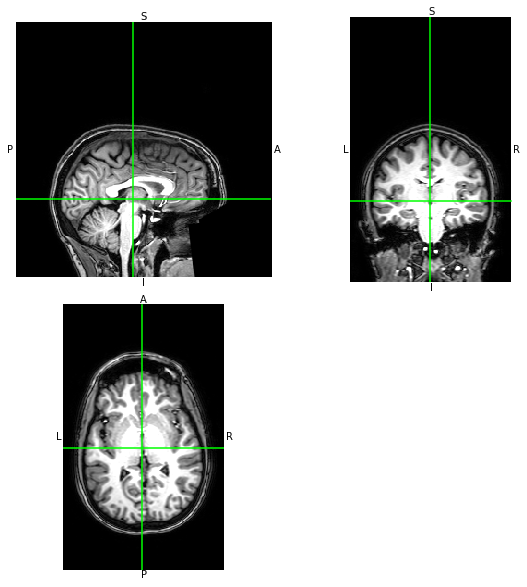

In [57]:
"""
We won't use the t_img, it seems to be a one time high res scan of the subject's brain, and was not a part
of the experimental procedure as far as I can tell.

From the paper:
    In addition to the functional scan, a high resolution T1-weighted anatomical MRI scan was
    made (3D gradient echo sequence, repetition time = 8.4 ms, echo time = 3.8 ms,
    flip angle = 8◦, FOV= 288 mm × 288 mm × 175 mm, 175 sagittal slices, voxel
    size = 1 mm × 1 mm × 1 mm). 
"""
nibabel_t_img.orthoview()

In [ ]:
"""
During scanning, subjects alternately viewed 24 s blocks of palatable food
images (8 blocks) and non-food images (i.e., office utensils; 8 blocks), interspersed
with 8–16 s rest blocks showing a crosshair (12 s on average). Halfway the task there
was a 10 s break. In the image blocks, 8 images were presented for 2.5 s each with a
0.5 s inter-stimulus interval. A
"""

In [9]:
"""
The functional scan was a T2-weighted gradient echo 2D-echo planar
imaging sequence (64 × 64 matrix, repetition time = 1600 ms, echo time = 23 ms,
flip angle = 72.5◦, FOV= 208 × 119 × 256 mm, SENSE factor AP = 2.4, 30 axial
3.6 mm slices with 0.4 mm gap, reconstructed voxel size = 4 mm × 4 mm × 4 mm).
In one functional run 370 scans were made (∼10 min). 

During the functional run, stimuli were presented on
a screen with the use of the E-Prime software package.
"""

# My commentary
"""
B is the T2-weighted, 
64 (either SAGITAL/CORONAL) 
  x 64 (other of SAGITAL/CORONAL) 
  x 30 (axial/horizontal, accounts for verticallity) 
  x 370 (scans, accounts for TIME)
  
1600 + 23 * 370 ms which is ~10 minutes(ah good)

So we can label each of the 370 scans approximately with the df_e, very interesting.

MEANWHILE
T is the T1-weighted, FOV dimensions??? So the principal experiment is B? What is T? A one time thing?
unclear what it's purpose is but I think I have what I need in B
"""

"""
FMRI data were preprocessed and analyzed with the SPM8 software package
(Wellcome Department of Imaging Neuroscience, London, United Kingdom,
(http://www.fil.ion.ucl.ac.uk/spm/software/spm8/) in conjunction with the MarsBar toolbox (http://marsbar.sourceforge.net/) run withMATLAB 7.9 (TheMathworks
Inc, Natick, MA). The functional volumes of every subject were realigned to the first
volume ofthe first run, globally normalized to Montreal Neurological Institute space
(MNI space) retaining 4 mm × 4 mm × 4 mm voxels, and spatially smoothed with a
gaussian kernel of 8 mm full width at half maximum. A statistical parametric map
was generated for every subject by fitting a boxcar function to each time series, convolved with the canonical hemodynamic response function. Data were high-pass
filtered with a cutoff of 128 s. Three conditions were modeled: viewing foods, viewing non-foods and the half-way break. For every subject, parameters were estimated
for three comparisons (referred to as contrasts); contrastimages were calculated for
viewing foods (F), viewing non-foods (NF) and for foods > non-foods (F > NF).
First, brain activation by food versus non-food images was assessed using a t-test
with phase of the menstrual cycle and hunger added as control variables.2
"""

167.36

In [79]:
n_scans = nibabel_b_img.shape[-1]
scan_time = 1.6 + 0.023  # from paper, seconds
total_time = n_scans * scan_time  # 608.625 seconds, or a little past 10 minutes

# Paper says the data should start from 0.0, we can assume the unaccounted for events past 

durations = df_e.onset - df_e.shift(periods=1).onset
supposed_ending = df_e.onset.iloc[-1] + durations.median()  # 589.3
 
# Unaccounted for time
print(total_time - supposed_ending)

19.324999999999932


<OrthoSlicer3D: /home/evan/workspace/scratch/cs682/project/data/ds000157/sub-01/func/sub-01_task-passiveimageviewing_bold.nii.gz (64, 64, 30, 375)>

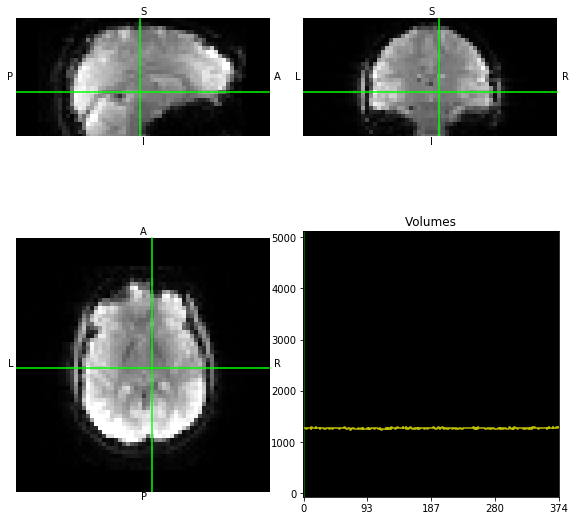

In [78]:
"""
Thoughts on what to do

1. Event times seem strict, so assume the unaccounted for time is either leading in or tailing the experiment
2. I read something about the data being processed to start at event 0.0, so I'll try calling the leftover a tail
3. If it doesn't seem right (test with neuroimage displaying) try splitting the difference in head+tail
"""

data = nibabel_b_img
data.orthoview()

In [100]:
def get_scan_assignments(img, events: pd.DataFrame):
    data = img.get_data()
    
    assignments = {
        "food":[],
        "nonfood":[],
        "break":[],
    }
    
    for timestep in range(data.shape[-1]):
        estimated_time = timestep * scan_time  # should be either 1600ms or 1623ms
        
        # Get the event with the highest onset covered by the estimated time of the scan
        event_proximity = events.onset - estimated_time
        latest_elapsed_event = len(event_proximity[event_proximity <= 0.0].index) - 1  # convert len to index
        matched_event = events.iloc[latest_elapsed_event]
        
        assignments[matched_event.trial_type].append(timestep)
        
    return assignments


scan_assignments = get_scan_assignments(nibabel_b_img, df_e)
print(list("{}: {}".format(k,len(v)) for k,v in scan_assignments.items()))

['food: 177', 'nonfood: 192', 'break: 6']


In [108]:
# TODO assign the label to slices for training

# TODO work on multiple subjects
b = nibabel_b_img
bd = b.get_data()

In [112]:
bd[:, :, :, 2].shape

(64, 64, 30)

In [49]:
# Available Modalities : T1w, bold
# TODO need to understand what the difference is, can I just use one?

from nilearn import plotting

img_path = os.path.join(os.getcwd(), ds_path, 'sub-01', 'func', b_img.filename)
# plotting.plot_img(nibabel_b_img)

# layout.to_df().path.values


In [24]:
from nilearn.datasets import fetch_haxby
data_files = fetch_haxby()

# Load behavioral data
import pandas as pd
behavioral = pd.read_csv(data_files.session_target[0], sep=" ")

# Restrict to face and house conditions
conditions = behavioral['labels']
condition_mask = conditions.isin(['face', 'house'])

# Split data into train and test samples, using the chunks
condition_mask_train = (condition_mask) & (behavioral['chunks'] <= 6)
condition_mask_test = (condition_mask) & (behavioral['chunks'] > 6)

# Apply this sample mask to X (fMRI data) and y (behavioral labels)
# Because the data is in one single large 4D image, we need to use
# index_img to do the split easily
from nilearn.image import index_img
func_filenames = data_files.func[0]
X_train = index_img(func_filenames, condition_mask_train)
X_test = index_img(func_filenames, condition_mask_test)
y_train = conditions[condition_mask_train]
y_test = conditions[condition_mask_test]

# Compute the mean epi to be used for the background of the plotting
from nilearn.image import mean_img
background_img = mean_img(func_filenames)


Dataset created in /home/evan/nilearn_data/haxby2001



Downloaded 2969 of 2969 bytes (100.0%,    0.0s remaining) ...done. (1 seconds, 0 min)
Downloaded 408 of 408 bytes (100.0%,    0.0s remaining) ...done. (0 seconds, 0 min)


Downloaded 291168628 of 291168628 bytes (100.0%,    0.0s remaining) ...done. (37 seconds, 0 min)
Extracting data from /home/evan/nilearn_data/haxby2001/f33ff337e914bf7fded743c7107979f9/subj2-2010.01.14.tar.gz..... done.


In [27]:
background_img.shape

(40, 64, 64)

In [7]:
from torchvision.models import vgg

model = vgg.vgg11()
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [8]:
model.train?